In [75]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2

In [76]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [77]:
ig = Image.open("Image6.jpg")

transform = T.ToTensor()
img = transform(ig)

In [78]:
with torch.no_grad():
    pred = model([img])

In [79]:
pred

[{'boxes': tensor([[219.2590, 329.6666, 237.4387, 396.9911],
          [227.2056, 280.2302, 332.4134, 365.9412],
          [255.9384, 341.8012, 272.3750, 398.1320],
          [328.2915, 283.3506, 338.9679, 318.6405],
          [364.7534, 307.0807, 515.6790, 475.2672],
          [611.9091, 201.6056, 619.3495, 223.4202],
          [116.0212, 342.5542, 371.9811, 466.9221],
          [377.1159, 268.2562, 439.8409, 376.7899],
          [ 99.5186, 309.7378, 214.4324, 451.6828],
          [598.0166, 202.7305, 610.8136, 222.2249],
          [453.3592, 192.0265, 469.9003, 238.3824],
          [337.2831, 283.5753, 345.4727, 317.4898],
          [245.6699, 342.5967, 258.3885, 394.3642],
          [309.9343, 336.5247, 475.1188, 476.0666],
          [297.2358, 424.3353, 450.2591, 478.4230],
          [269.2769, 298.6514, 419.4149, 337.7099],
          [437.0833, 235.7502, 471.6352, 306.7017],
          [236.1306, 285.3929, 427.0717, 356.3192],
          [604.0629, 203.1407, 611.4541, 220.4964],
   

In [91]:
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

num = torch.argwhere(scores > 0.9).shape[0]

coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , "frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , "baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , "plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,  "banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" , "pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" , "mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" , "laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" , "oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

igg = cv2.imread("image6.jpg")

font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(num):
    print(scores[i])
    x1, y1, x2, y2 = bboxes[i].numpy().astype(int)
    # print(labels.numpy().tolist())
    class_name = coco_names[labels.numpy()[i]-1]
    igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 0, 255), 2)
    igg = cv2.putText(igg, class_name, (x1, y1-10), font, 0.7, (0, 0, 255), 2, cv2.LINE_AA)

tensor(0.9891)
tensor(0.9849)
tensor(0.9813)
tensor(0.9808)
tensor(0.9724)
tensor(0.9666)
tensor(0.9066)


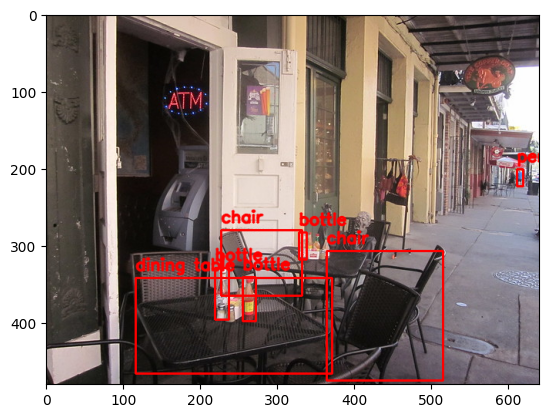

In [92]:
import matplotlib.pyplot as plt


plt.imshow(cv2.cvtColor(igg, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()